In [1030]:
import pandas as pd
import numpy as np
import re
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, WhiteKernel

In [153]:
sklearn.__version__ 

'0.18.1'

In [1031]:
organics = pd.read_csv('organics.csv', encoding = "ISO-8859-1")

In [1032]:
organics.head(15)

,"Table 5. Concentrations of selected anions, ammonium, and nitrous oxide in groundwater samples collected from wells and multilevel samplers, Ashumet Valley treated-wastewater plume, Cape Cod, Massachusetts, 2007.",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,"[Source of data: Richard L. Smith, U.S. Geolog...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Well or multilevel-sampler port name,Altitude of midpoint of screen (ft),Sampling date,"Nitrate,\ndissolved\n(µM)","Nitrite,\ndissolved\n(µM)","Ammonium,\ndissolved\n(µM)","Chloride,\ndissolved\n(µM)","Sulfate,\ndissolved\n(µM)",Nitrous oxide (µM),NaN,NaN,NaN,NaN
2,FSW 168-M15-01PT,20.76,07/24/07,<2,<0.5,<2,239,53,0.009,NaN,NaN,NaN,NaN
3,FSW 168-M15-02GNT,10.76,07/24/07,172,<0.5,<2,616,40,0.079,NaN,NaN,NaN,NaN
4,FSW 168-M15-03RT,0.76,07/24/07,26,<0.5,<2,790,115,0.022,NaN,NaN,NaN,NaN
5,FSW 168-M15-05BKT,-9.24,07/24/07,60,<0.5,<2,336,82,0.006,NaN,NaN,NaN,NaN
6,FSW 168-M15-05BKT-D,-9.24,07/24/07,60,<0.5,<2,333,83,--,NaN,NaN,NaN,NaN
7,FSW 168-M16-01PT,-13.12,07/24/07,116,<0.5,<2,344,70,<0.002,NaN,NaN,NaN,NaN
8,FSW 168-M16-02GNT,-14.12,07/24/07,125,<0.5,<2,349,67,<0.002,NaN,NaN,NaN,NaN
9,FSW 168-M15-06WT,-14.24,07/24/07,125,<0.5,<2,342,67,<0.002,NaN,NaN,NaN,NaN


In [1033]:
new_header = organics.iloc[1] #grab the first row for the header
organics = organics[2:] #take the data less the header row
organics.rename(columns = new_header, inplace=True)

In [1034]:
organics.head()

,Well or multilevel-sampler port name,Altitude of midpoint of screen (ft),Sampling date,"Nitrate, dissolved (µM)","Nitrite, dissolved (µM)","Ammonium, dissolved (µM)","Chloride, dissolved (µM)","Sulfate, dissolved (µM)",Nitrous oxide (µM),nan,nan,nan,nan
2,FSW 168-M15-01PT,20.76,07/24/07,<2,<0.5,<2,239,53,0.009,NaN,NaN,NaN,NaN
3,FSW 168-M15-02GNT,10.76,07/24/07,172,<0.5,<2,616,40,0.079,NaN,NaN,NaN,NaN
4,FSW 168-M15-03RT,0.76,07/24/07,26,<0.5,<2,790,115,0.022,NaN,NaN,NaN,NaN
5,FSW 168-M15-05BKT,-9.24,07/24/07,60,<0.5,<2,336,82,0.006,NaN,NaN,NaN,NaN
6,FSW 168-M15-05BKT-D,-9.24,07/24/07,60,<0.5,<2,333,83,--,NaN,NaN,NaN,NaN


In [1145]:
sklearn.__version__

'0.18.1'

In [1035]:
organics = organics.iloc[:, :9]

In [1036]:
organics

,Well or multilevel-sampler port name,Altitude of midpoint of screen (ft),Sampling date,"Nitrate, dissolved (µM)","Nitrite, dissolved (µM)","Ammonium, dissolved (µM)","Chloride, dissolved (µM)","Sulfate, dissolved (µM)",Nitrous oxide (µM)
2,FSW 168-M15-01PT,20.76,07/24/07,<2,<0.5,<2,239,53,0.009
3,FSW 168-M15-02GNT,10.76,07/24/07,172,<0.5,<2,616,40,0.079
4,FSW 168-M15-03RT,0.76,07/24/07,26,<0.5,<2,790,115,0.022
5,FSW 168-M15-05BKT,-9.24,07/24/07,60,<0.5,<2,336,82,0.006
6,FSW 168-M15-05BKT-D,-9.24,07/24/07,60,<0.5,<2,333,83,--
7,FSW 168-M16-01PT,-13.12,07/24/07,116,<0.5,<2,344,70,<0.002
8,FSW 168-M16-02GNT,-14.12,07/24/07,125,<0.5,<2,349,67,<0.002
9,FSW 168-M15-06WT,-14.24,07/24/07,125,<0.5,<2,342,67,<0.002
10,FSW 168-M16-03RT,-15.12,07/24/07,132,<0.5,<2,365,66,<0.002
11,FSW 168-M16-04BUT,-16.12,07/24/07,127,<0.5,<2,349,67,<0.002


In [1037]:
organics.dropna(axis=0, how='all', inplace=True)

In [1038]:
organics

,Well or multilevel-sampler port name,Altitude of midpoint of screen (ft),Sampling date,"Nitrate, dissolved (µM)","Nitrite, dissolved (µM)","Ammonium, dissolved (µM)","Chloride, dissolved (µM)","Sulfate, dissolved (µM)",Nitrous oxide (µM)
2,FSW 168-M15-01PT,20.76,07/24/07,<2,<0.5,<2,239,53,0.009
3,FSW 168-M15-02GNT,10.76,07/24/07,172,<0.5,<2,616,40,0.079
4,FSW 168-M15-03RT,0.76,07/24/07,26,<0.5,<2,790,115,0.022
5,FSW 168-M15-05BKT,-9.24,07/24/07,60,<0.5,<2,336,82,0.006
6,FSW 168-M15-05BKT-D,-9.24,07/24/07,60,<0.5,<2,333,83,--
7,FSW 168-M16-01PT,-13.12,07/24/07,116,<0.5,<2,344,70,<0.002
8,FSW 168-M16-02GNT,-14.12,07/24/07,125,<0.5,<2,349,67,<0.002
9,FSW 168-M15-06WT,-14.24,07/24/07,125,<0.5,<2,342,67,<0.002
10,FSW 168-M16-03RT,-15.12,07/24/07,132,<0.5,<2,365,66,<0.002
11,FSW 168-M16-04BUT,-16.12,07/24/07,127,<0.5,<2,349,67,<0.002


In [1039]:
new_header_2 = ['well', 'screen_alt_mid_ft', 'date', 'nitrate_um', 'nitrite_um', 'nh3_um', 'chloride_um', 'sulfate_um', 'n2o_um']
organics.columns=new_header_2

In [1040]:
organics['n2o_um2'] = organics['n2o_um']
organics.loc[organics['n2o_um'] == '<0.002', 'n2o_um2'] = 0.001

In [1041]:
organics['n2o_um'] = organics['n2o_um2']

In [1042]:
del organics['n2o_um2']

In [1043]:
organics

,well,screen_alt_mid_ft,date,nitrate_um,nitrite_um,nh3_um,chloride_um,sulfate_um,n2o_um
2,FSW 168-M15-01PT,20.76,07/24/07,<2,<0.5,<2,239,53,0.009
3,FSW 168-M15-02GNT,10.76,07/24/07,172,<0.5,<2,616,40,0.079
4,FSW 168-M15-03RT,0.76,07/24/07,26,<0.5,<2,790,115,0.022
5,FSW 168-M15-05BKT,-9.24,07/24/07,60,<0.5,<2,336,82,0.006
6,FSW 168-M15-05BKT-D,-9.24,07/24/07,60,<0.5,<2,333,83,--
7,FSW 168-M16-01PT,-13.12,07/24/07,116,<0.5,<2,344,70,0.001
8,FSW 168-M16-02GNT,-14.12,07/24/07,125,<0.5,<2,349,67,0.001
9,FSW 168-M15-06WT,-14.24,07/24/07,125,<0.5,<2,342,67,0.001
10,FSW 168-M16-03RT,-15.12,07/24/07,132,<0.5,<2,365,66,0.001
11,FSW 168-M16-04BUT,-16.12,07/24/07,127,<0.5,<2,349,67,0.001


# Coordinates

In [1044]:
coords_wells = pd.read_csv('coords_levels_wells.csv', encoding = "ISO-8859-1")

In [1045]:
new_header = coords_wells.iloc[1] #grab the first row for the header
coords_wells = coords_wells[2:] #take the data less the header row
coords_wells.rename(columns = new_header, inplace=True)

In [1046]:
coords_wells = coords_wells.iloc[:, :10]

In [1047]:
coords_wells.dropna(axis=0, how='all', inplace=True)

In [1048]:
coords_wells

,Well name,Latitude,Longitude,Altitude of land surface (ft),Altitude of top of screen (ft),Altitude of bottom of screen (ft),Well diameter (in.),Well casing and screen material,Date of water-level measure-ment,Altitude of water level (ft)
2,FSW 230-0042,413818.38,703240.46,87.06,46.66,44.66,2.00,PVC,08/01/07,49.26
3,FSW 230-0048,413818.38,703240.46,86.20,47.80,37.80,2.00,PVC,08/01/07,49.26
4,FSW 230-0049,413818.38,703240.46,86.14,38.74,36.74,2.00,PVC,08/01/07,49.28
5,FSW 230-0058,413818.38,703240.46,85.93,29.93,27.93,2.00,PVC,08/01/07,49.26
6,FSW 230-0068,413818.38,703240.46,86.33,20.24,18.24,2.00,PVC,08/01/07,49.30
7,FSW 230-0078,413818.38,703240.46,86.46,10.51,8.54,2.00,PVC,08/01/07,49.31
8,FSW 230-0088,413818.38,703240.46,86.35,0.32,-1.68,2.00,PVC,08/01/07,49.30
9,FSW 230-0108,413818.38,703240.46,86.13,-20.02,-22.02,2.00,PVC,08/01/07,49.29
10,FSW 230-0127,413818.38,703240.46,86.06,-39.33,-41.33,2.00,PVC,08/01/07,49.32
12,FSW 236-0070,413814.47,703249.89,98.05,30.15,28.15,2.00,PVC,06/07/07,49.94


In [1049]:
new_header_3 = ['well', 'lat', 'long', 'land_alt_ft', 'screen_top_ft', 'screen_bot_ft', 'del1', 'del2', 'del3', 'h2o_alt_ft']
coords_wells.columns=new_header_3

In [1050]:
del coords_wells['del1']

In [1051]:
del coords_wells['del2']
del coords_wells['del3']

In [1052]:
coords_wells

,well,lat,long,land_alt_ft,screen_top_ft,screen_bot_ft,h2o_alt_ft
2,FSW 230-0042,413818.38,703240.46,87.06,46.66,44.66,49.26
3,FSW 230-0048,413818.38,703240.46,86.20,47.80,37.80,49.26
4,FSW 230-0049,413818.38,703240.46,86.14,38.74,36.74,49.28
5,FSW 230-0058,413818.38,703240.46,85.93,29.93,27.93,49.26
6,FSW 230-0068,413818.38,703240.46,86.33,20.24,18.24,49.30
7,FSW 230-0078,413818.38,703240.46,86.46,10.51,8.54,49.31
8,FSW 230-0088,413818.38,703240.46,86.35,0.32,-1.68,49.30
9,FSW 230-0108,413818.38,703240.46,86.13,-20.02,-22.02,49.29
10,FSW 230-0127,413818.38,703240.46,86.06,-39.33,-41.33,49.32
12,FSW 236-0070,413814.47,703249.89,98.05,30.15,28.15,49.94


In [1053]:
coords_multi = pd.read_csv('coords_levels_multi.csv', encoding = "ISO-8859-1")

In [1054]:
new_header = coords_multi.iloc[1] #grab the first row for the header
coords_multi = coords_multi[2:] #take the data less the header row
coords_multi.rename(columns = new_header, inplace=True)

In [1055]:
coords_multi = coords_multi.iloc[:, :7]

In [1056]:
new_header_3 = ['well', 'lat', 'long', 'land_alt_ft', 'screen_top_ft', 'screen_bot_ft', 'h2o_alt_ft']
coords_multi.columns=new_header_3

In [1057]:
coords_multi.dropna(axis=0, how='all', inplace=True)

In [1058]:
coords_multi

,well,lat,long,land_alt_ft,screen_top_ft,screen_bot_ft,h2o_alt_ft
2,FSW 168-M15-01PT,413700.98,703258.18,44.71,20.81,20.71,37
3,FSW 168-M15-02GNT,413700.98,703258.18,44.71,10.81,10.71,37
4,FSW 168-M15-03RT,413700.98,703258.18,44.71,0.81,0.71,37
5,FSW 168-M15-05BKT,413700.98,703258.18,44.71,-9.19,-9.29,37
6,FSW 168-M15-06WT,413700.98,703258.18,44.71,-14.19,-14.29,37
7,FSW 168-M15-07O,413700.98,703258.18,44.71,-19.19,-19.29,37
8,FSW 168-M15-08GY,413700.98,703258.18,44.71,-24.19,-24.29,37
9,FSW 168-M15-09Y,413700.98,703258.18,44.71,-29.19,-29.29,37
10,FSW 168-M15-10P,413700.98,703258.18,44.71,-34.19,-34.29,37
11,FSW 168-M15-11GN,413700.98,703258.18,44.71,-39.19,-39.29,37


In [1059]:
coords_wells_multi = pd.concat([coords_wells, coords_multi])

In [1060]:
coords_wells_multi

,well,lat,long,land_alt_ft,screen_top_ft,screen_bot_ft,h2o_alt_ft
2,FSW 230-0042,413818.38,703240.46,87.06,46.66,44.66,49.26
3,FSW 230-0048,413818.38,703240.46,86.20,47.80,37.80,49.26
4,FSW 230-0049,413818.38,703240.46,86.14,38.74,36.74,49.28
5,FSW 230-0058,413818.38,703240.46,85.93,29.93,27.93,49.26
6,FSW 230-0068,413818.38,703240.46,86.33,20.24,18.24,49.30
7,FSW 230-0078,413818.38,703240.46,86.46,10.51,8.54,49.31
8,FSW 230-0088,413818.38,703240.46,86.35,0.32,-1.68,49.30
9,FSW 230-0108,413818.38,703240.46,86.13,-20.02,-22.02,49.29
10,FSW 230-0127,413818.38,703240.46,86.06,-39.33,-41.33,49.32
12,FSW 236-0070,413814.47,703249.89,98.05,30.15,28.15,49.94


In [1061]:
organics_coords = organics.merge(coords_wells_multi, how='left', on='well')

In [1062]:
organics_coords.sample(30)

,well,screen_alt_mid_ft,date,nitrate_um,nitrite_um,nh3_um,chloride_um,sulfate_um,n2o_um,lat,long,land_alt_ft,screen_top_ft,screen_bot_ft,h2o_alt_ft
567,FSW 508-M01-08GY,-23.28,07/26/07,182,<0.5,382,509,80,--,413706.37,703254.73,45.20,-23.23,-23.33,38
519,FSW 472-M01-09Y,-35.34,06/21/07,151,<0.5,<2,394,157,--,413648.42,703302.63,40.29,-35.29,-35.39,34
879,FSW 620-M01-08GY,-8.24,06/01/07,61,<0.5,<2,865,129,--,413808.74,703224.32,51.27,-8.19,-8.29,46
967,FSW 660-0085,-37.98,09/10/07,20,<0.5,<2,404,58,--,413533.82,703336.33,45.65,-37.00,-38.96,15.91
236,FSW 347-M01-15W,14.95,05/15/07,<2,<0.5,<2,403,172,--,413811.27,703232.01,59.90,15.00,14.90,47
843,FSW 618-M01-04BUT,19.04,05/16/07,53,<0.5,<2,678,93,--,413812.30,703226.20,69.17,19.09,18.99,47
216,FSW 343-M01-12R,-52.47,06/18/07,25,<0.5,<2,235,82,0.023,413814.59,703235.12,68.90,-52.42,-52.52,49
566,FSW 508-M01-07O,-18.28,07/26/07,158,<0.5,188,458,76,--,413706.37,703254.73,45.20,-18.23,-18.33,38
1061,SDW 318-M01-15W,18.96,05/17/07,38,<0.5,<2,531,62,--,413820.51,703243.57,68.04,19.01,18.91,50
531,FSW 474-0129,-60.24,09/05/07,420,<0.5,<2,478,74,--,413626.46,703258.22,67.66,-59.24,-61.24,30.02


# Inorganics

In [1063]:
inorganics = pd.read_csv('inorganics.csv', encoding = "ISO-8859-1")

In [1064]:
new_header = inorganics.iloc[1] #grab the first row for the header
inorganics = inorganics[2:] #take the data less the header row
inorganics.rename(columns = new_header, inplace=True)

In [1065]:
inorganics = inorganics.iloc[:, :23]

In [1066]:
inorganics.dropna(axis=0, how='all', inplace=True)

In [1067]:
inorganics.columns

Index(['Well or multilevel-sampler port name',
       'Altitude of midpoint of screen    (ft)', 'Sampling date',
       'Aluminum,\ndissolved\n(µM)', 'Arsenic,\ndissolved\n(µM)',
       'Boron,\ndissolved\n(µM)', 'Barium,\ndissolved\n(µM)',
       'Calcium,\ndissolved\n(µM)', 'Cadmium,\ndissolved\n(µM)',
       'Cobalt,\ndissolved\n(µM)', 'Copper,\ndissolved\n(µM)',
       'Iron,\ndissolved\n(µM)', 'Potassium,\ndissolved\n(µM)',
       'Lithium,\ndissolved\n(µM)', 'Magnesium,\ndissolved\n(µM)',
       'Manganese,\ndissolved\n(µM)', 'Sodium,\ndissolved\n(µM)',
       'Nickel,\ndissolved\n(µM)', 'Phosphorus,\ndissolved\n(µM)',
       'Sulfur, \ndissolved\n(µM)', 'Silica,\ndissolved\n(µM)',
       'Strontium,\ndissolved\n(µM)', 'Zinc,\ndissolved\n(µM)'],
      dtype='object')

In [1068]:
inorganics_use = inorganics.iloc[:, [0,1,3,5,8,9,10,11,21,22]]

In [1069]:
new_header_4 = ['well', 'alt_ft', 'Al_um', 'B_um', 'Cd_um', 'Co_um', 'Cu_um', 'Fe_um', 'Sr_um', 'Zn_um']
inorganics_use.columns=new_header_4

In [1070]:
inorganics_use.head()

,well,alt_ft,Al_um,B_um,Cd_um,Co_um,Cu_um,Fe_um,Sr_um,Zn_um
2,FSW 168-M15-01PT,20.76,3.80,0.6,<0.009,<0.02,<0.03,<0.09,0.20,0.20
3,FSW 168-M15-02GNT,10.76,<3.15,1.2,<0.009,<0.02,<0.03,<0.09,0.29,0.24
4,FSW 168-M15-03RT,0.76,<3.15,1.5,<0.009,<0.02,<0.03,<0.09,0.31,0.23
5,FSW 168-M15-05BKT,-9.24,<3.15,1.0,<0.009,<0.02,<0.03,<0.09,0.14,0.21
6,FSW 168-M15-05BKT-D,-9.24,<3.15,1.0,<0.009,<0.02,0.19,<0.09,0.14,1.63


In [1071]:
org_inorg_coord = organics_coords.merge(inorganics_use, how='left', on='well')

In [1072]:
org_inorg_coord.sample(30)

,well,screen_alt_mid_ft,date,nitrate_um,nitrite_um,nh3_um,chloride_um,sulfate_um,n2o_um,lat,...,h2o_alt_ft,alt_ft,Al_um,B_um,Cd_um,Co_um,Cu_um,Fe_um,Sr_um,Zn_um
259,FSW 350-M01-08GY,-32.66,08/13/07,190,<0.5,38,333,135,0.001,413645.80,...,34,-32.66,<3.15,7.0,<0.009,<0.02,0.14,<0.09,0.50,0.24
338,FSW 388-M01-11GN,4.09,07/26/07,<2,<0.5,22,1334,85,--,413809.50,...,46,4.09,<3.15,3.9,<0.009,0.08,<0.03,<0.09,0.22,0.13
1042,SDW 316-0066,30.67,08/29/07,14,<0.5,<2,586,85,--,413818.39,...,48.39,30.67,<3.15,1.2,<0.009,<0.02,<0.03,0.2,0.63,0.37
346,FSW 388-M02-04BUT,-20.84,07/26/07,48,<0.5,<2,771,48,--,413809.54,...,46,-20.84,<3.15,1.6,<0.009,<0.02,<0.03,<0.09,0.19,0.19
98,FSW 267-0155,-99.65,09/12/07,8,<0.5,<2,269,170,--,413736.93,...,42.08,-99.65,<3.15,<0.55,<0.009,<0.02,<0.03,60.3,0.56,0.20
330,FSW 388-0037,33.18,09/24/07,100,<0.5,<2,265,98,--,413809.48,...,46.06,33.18,<3.15,2.3,<0.009,<0.02,<0.03,0.1,0.58,0.16
93,FSW 262-0159,-110.90,06/28/07,40,<0.5,<2,303,228,0.088,413712.66,...,39.95,-110.90,<3.15,5.7,<0.009,0.05,<0.03,7.5,0.76,0.26
332,FSW 388-M01-05BKT,27.14,07/26/07,236,5.7,<2,543,220,--,413809.50,...,46,27.14,<3.15,4.4,<0.009,<0.02,<0.03,<0.09,0.62,0.19
769,FSW 577-0071,24.46,07/19/07,<2,<0.5,4,957,101,--,413817.19,...,49.03,24.46,<3.15,1.2,<0.009,0.10,<0.03,7.1,0.34,0.20
1162,SDW 470-M01-12R,-18.84,05/22/07,34,<0.5,<2,534,138,--,413818.80,...,48,-18.84,<3.15,1.2,<0.009,<0.02,<0.03,<0.09,0.11,0.45


In [1073]:
org_inorg_coord.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1288 entries, 0 to 1287
Data columns (total 24 columns):
well                 1288 non-null object
screen_alt_mid_ft    1288 non-null object
date                 1288 non-null object
nitrate_um           1287 non-null object
nitrite_um           1287 non-null object
nh3_um               1287 non-null object
chloride_um          1287 non-null object
sulfate_um           1287 non-null object
n2o_um               1288 non-null object
lat                  1175 non-null object
long                 1175 non-null object
land_alt_ft          1175 non-null object
screen_top_ft        1175 non-null object
screen_bot_ft        1175 non-null object
h2o_alt_ft           1175 non-null object
alt_ft               1286 non-null object
Al_um                1286 non-null object
B_um                 1286 non-null object
Cd_um                1286 non-null object
Co_um                1286 non-null object
Cu_um                1286 non-null object
Fe_um      

In [1074]:
org_inorg_coord.replace(to_replace ="<2", value=1, inplace=True)

In [1075]:
org_inorg_coord.replace(to_replace ="<0.5", value=0.25, inplace=True)
org_inorg_coord.replace(to_replace ="<3.15", value=1.575, inplace=True)
org_inorg_coord.replace(to_replace ="<0.009", value=0.0045, inplace=True)
org_inorg_coord.replace(to_replace ="<0.02", value=0.01, inplace=True)
org_inorg_coord.replace(to_replace ="<0.03", value=0.015, inplace=True)
org_inorg_coord.replace(to_replace ="<0.09", value=0.045, inplace=True)

In [1076]:
org_inorg_coord.head(30)

,well,screen_alt_mid_ft,date,nitrate_um,nitrite_um,nh3_um,chloride_um,sulfate_um,n2o_um,lat,...,h2o_alt_ft,alt_ft,Al_um,B_um,Cd_um,Co_um,Cu_um,Fe_um,Sr_um,Zn_um
0,FSW 168-M15-01PT,20.76,07/24/07,1,0.25,1,239,53,0.009,413700.98,...,37,20.76,3.80,0.6,0.0045,0.01,0.015,0.045,0.20,0.20
1,FSW 168-M15-02GNT,10.76,07/24/07,172,0.25,1,616,40,0.079,413700.98,...,37,10.76,1.575,1.2,0.0045,0.01,0.015,0.045,0.29,0.24
2,FSW 168-M15-03RT,0.76,07/24/07,26,0.25,1,790,115,0.022,413700.98,...,37,0.76,1.575,1.5,0.0045,0.01,0.015,0.045,0.31,0.23
3,FSW 168-M15-05BKT,-9.24,07/24/07,60,0.25,1,336,82,0.006,413700.98,...,37,-9.24,1.575,1.0,0.0045,0.01,0.015,0.045,0.14,0.21
4,FSW 168-M15-05BKT-D,-9.24,07/24/07,60,0.25,1,333,83,--,NaN,...,NaN,-9.24,1.575,1.0,0.0045,0.01,0.19,0.045,0.14,1.63
5,FSW 168-M16-01PT,-13.12,07/24/07,116,0.25,1,344,70,0.001,413701.00,...,37,-13.12,1.575,1.1,0.0045,0.01,0.015,0.045,0.16,0.26
6,FSW 168-M16-02GNT,-14.12,07/24/07,125,0.25,1,349,67,0.001,413701.00,...,37,-14.12,1.575,1.1,0.0045,0.01,0.015,0.045,0.17,0.15
7,FSW 168-M15-06WT,-14.24,07/24/07,125,0.25,1,342,67,0.001,413700.98,...,37,-14.24,1.575,1.2,0.0045,0.01,0.015,0.045,0.18,0.22
8,FSW 168-M16-03RT,-15.12,07/24/07,132,0.25,1,365,66,0.001,413701.00,...,37,-15.12,1.575,1.2,0.0045,0.01,0.015,0.045,0.18,0.20
9,FSW 168-M16-04BUT,-16.12,07/24/07,127,0.25,1,349,67,0.001,413701.00,...,37,-16.12,1.575,1.1,0.0045,0.01,0.015,0.045,0.18,0.20


In [1077]:
del org_inorg_coord['alt_ft']

In [1078]:
del org_inorg_coord['date']

In [1079]:
org_inorg_coord

,well,screen_alt_mid_ft,nitrate_um,nitrite_um,nh3_um,chloride_um,sulfate_um,n2o_um,lat,long,...,screen_bot_ft,h2o_alt_ft,Al_um,B_um,Cd_um,Co_um,Cu_um,Fe_um,Sr_um,Zn_um
0,FSW 168-M15-01PT,20.76,1,0.25,1,239,53,0.009,413700.98,703258.18,...,20.71,37,3.80,0.6,0.0045,0.01,0.015,0.045,0.20,0.20
1,FSW 168-M15-02GNT,10.76,172,0.25,1,616,40,0.079,413700.98,703258.18,...,10.71,37,1.575,1.2,0.0045,0.01,0.015,0.045,0.29,0.24
2,FSW 168-M15-03RT,0.76,26,0.25,1,790,115,0.022,413700.98,703258.18,...,0.71,37,1.575,1.5,0.0045,0.01,0.015,0.045,0.31,0.23
3,FSW 168-M15-05BKT,-9.24,60,0.25,1,336,82,0.006,413700.98,703258.18,...,-9.29,37,1.575,1.0,0.0045,0.01,0.015,0.045,0.14,0.21
4,FSW 168-M15-05BKT-D,-9.24,60,0.25,1,333,83,--,NaN,NaN,...,NaN,NaN,1.575,1.0,0.0045,0.01,0.19,0.045,0.14,1.63
5,FSW 168-M16-01PT,-13.12,116,0.25,1,344,70,0.001,413701.00,703258.19,...,-13.17,37,1.575,1.1,0.0045,0.01,0.015,0.045,0.16,0.26
6,FSW 168-M16-02GNT,-14.12,125,0.25,1,349,67,0.001,413701.00,703258.19,...,-14.17,37,1.575,1.1,0.0045,0.01,0.015,0.045,0.17,0.15
7,FSW 168-M15-06WT,-14.24,125,0.25,1,342,67,0.001,413700.98,703258.18,...,-14.29,37,1.575,1.2,0.0045,0.01,0.015,0.045,0.18,0.22
8,FSW 168-M16-03RT,-15.12,132,0.25,1,365,66,0.001,413701.00,703258.19,...,-15.17,37,1.575,1.2,0.0045,0.01,0.015,0.045,0.18,0.20
9,FSW 168-M16-04BUT,-16.12,127,0.25,1,349,67,0.001,413701.00,703258.19,...,-16.17,37,1.575,1.1,0.0045,0.01,0.015,0.045,0.18,0.20


In [1080]:
org_inorg_coord.replace(to_replace ="<0.55", value=0.275, inplace=True)
org_inorg_coord.replace(to_replace ="<0.006", value=0.003, inplace=True)
org_inorg_coord.replace(to_replace ="<0.038", value=0.019, inplace=True)

In [1081]:
#Checking to make sure I got all the detection limits:

In [1082]:
org_inorg_coord.select_dtypes([np.object]).apply(lambda x: x.str.contains('<').any())

well                 False
screen_alt_mid_ft    False
nitrate_um           False
nitrite_um           False
nh3_um               False
chloride_um          False
sulfate_um           False
n2o_um               False
lat                  False
long                 False
land_alt_ft          False
screen_top_ft        False
screen_bot_ft        False
h2o_alt_ft           False
Al_um                False
B_um                 False
Cd_um                False
Co_um                False
Cu_um                False
Fe_um                False
Sr_um                False
Zn_um                False
dtype: bool

In [1083]:
organics.select_dtypes([np.object]).apply(lambda x: x.str.contains('<').any())

well                 False
screen_alt_mid_ft    False
date                 False
nitrate_um            True
nitrite_um            True
nh3_um                True
chloride_um           True
sulfate_um            True
n2o_um               False
dtype: bool

In [1084]:
org_inorg_coord.isnull().sum()

well                   0
screen_alt_mid_ft      0
nitrate_um             1
nitrite_um             1
nh3_um                 1
chloride_um            1
sulfate_um             1
n2o_um                 0
lat                  113
long                 113
land_alt_ft          113
screen_top_ft        113
screen_bot_ft        113
h2o_alt_ft           113
Al_um                  2
B_um                   2
Cd_um                  2
Co_um                  2
Cu_um                  2
Fe_um                  2
Sr_um                  2
Zn_um                  2
dtype: int64

In [1085]:
df = org_inorg_coord

In [1086]:
df[df.isnull().any(axis=1)]

,well,screen_alt_mid_ft,nitrate_um,nitrite_um,nh3_um,chloride_um,sulfate_um,n2o_um,lat,long,...,screen_bot_ft,h2o_alt_ft,Al_um,B_um,Cd_um,Co_um,Cu_um,Fe_um,Sr_um,Zn_um
4,FSW 168-M15-05BKT-D,-9.24,60,0.25,1,333,83,--,NaN,NaN,...,NaN,NaN,1.575,1.0,0.0045,0.01,0.19,0.045,0.14,1.63
14,FSW 168-M16-07O-D,-20.12,134,0.25,10,345,69,--,NaN,NaN,...,NaN,NaN,1.575,2.3,0.0045,0.01,0.015,0.045,0.25,0.19
24,FSW 168-M15-09Y-D,-29.24,167,0.25,479,591,75,--,NaN,NaN,...,NaN,NaN,1.575,3.8,0.0045,0.01,0.015,0.045,0.15,0.18
35,FSW 230-0058-D,28.93,22,0.25,1,839,36,--,NaN,NaN,...,NaN,NaN,1.575,0.9,0.0045,0.03,0.015,0.045,0.13,1.43
44,FSW 236-0106-D,-6.40,30,0.25,1,536,76,--,NaN,NaN,...,NaN,NaN,1.575,1.0,0.0045,0.01,0.015,2.2,0.17,0.28
55,FSW 239-M01-08GY-D,6.28,45,6.7,1,375,128,--,NaN,NaN,...,NaN,NaN,1.575,3.0,0.0045,0.01,0.015,0.045,0.17,0.22
70,FSW 254-0072-D,-14.35,13,0.25,67,441,71,--,NaN,NaN,...,NaN,NaN,1.575,7.7,0.0045,0.01,0.015,2.8,0.21,0.19
81,FSW 262-0069-D,-20.50,148,0.25,1,340,74,--,NaN,NaN,...,NaN,NaN,1.575,2.7,0.0045,0.01,0.015,0.045,0.21,0.019
85,FSW 262-M01-09Y-D,-32.50,139,0.25,408,436,73,--,NaN,NaN,...,NaN,NaN,1.575,7.9,0.0045,0.01,2.29,0.045,0.19,1.53
97,FSW 267-0136-D,-79.87,36,0.25,1,986,135,--,NaN,NaN,...,NaN,NaN,1.575,0.7,0.0045,0.01,0.015,0.045,0.56,0.19


It looks like these are the duplicate samples, and it's fine to drop them. 

In [1087]:
df.dropna(axis=0, how='any', inplace=True)

In [1088]:
df

,well,screen_alt_mid_ft,nitrate_um,nitrite_um,nh3_um,chloride_um,sulfate_um,n2o_um,lat,long,...,screen_bot_ft,h2o_alt_ft,Al_um,B_um,Cd_um,Co_um,Cu_um,Fe_um,Sr_um,Zn_um
0,FSW 168-M15-01PT,20.76,1,0.25,1,239,53,0.009,413700.98,703258.18,...,20.71,37,3.80,0.6,0.0045,0.01,0.015,0.045,0.20,0.20
1,FSW 168-M15-02GNT,10.76,172,0.25,1,616,40,0.079,413700.98,703258.18,...,10.71,37,1.575,1.2,0.0045,0.01,0.015,0.045,0.29,0.24
2,FSW 168-M15-03RT,0.76,26,0.25,1,790,115,0.022,413700.98,703258.18,...,0.71,37,1.575,1.5,0.0045,0.01,0.015,0.045,0.31,0.23
3,FSW 168-M15-05BKT,-9.24,60,0.25,1,336,82,0.006,413700.98,703258.18,...,-9.29,37,1.575,1.0,0.0045,0.01,0.015,0.045,0.14,0.21
5,FSW 168-M16-01PT,-13.12,116,0.25,1,344,70,0.001,413701.00,703258.19,...,-13.17,37,1.575,1.1,0.0045,0.01,0.015,0.045,0.16,0.26
6,FSW 168-M16-02GNT,-14.12,125,0.25,1,349,67,0.001,413701.00,703258.19,...,-14.17,37,1.575,1.1,0.0045,0.01,0.015,0.045,0.17,0.15
7,FSW 168-M15-06WT,-14.24,125,0.25,1,342,67,0.001,413700.98,703258.18,...,-14.29,37,1.575,1.2,0.0045,0.01,0.015,0.045,0.18,0.22
8,FSW 168-M16-03RT,-15.12,132,0.25,1,365,66,0.001,413701.00,703258.19,...,-15.17,37,1.575,1.2,0.0045,0.01,0.015,0.045,0.18,0.20
9,FSW 168-M16-04BUT,-16.12,127,0.25,1,349,67,0.001,413701.00,703258.19,...,-16.17,37,1.575,1.1,0.0045,0.01,0.015,0.045,0.18,0.20
10,FSW 168-M16-05BKT,-18.12,133,0.25,3,414,66,0.001,413701.00,703258.19,...,-18.17,37,1.575,1.7,0.0045,0.01,0.015,0.045,0.25,0.20


# MODELING 

The report said that the plume is characterized by nitrate, chloride, and boron, so let's start with those.

### 3-D:

In [1089]:
df1 = df.iloc[:, [1,8,9,2,5,15]]

In [1189]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1173 entries, 0 to 1285
Data columns (total 6 columns):
screen_alt_mid_ft    1173 non-null object
lat                  1173 non-null object
long                 1173 non-null object
nitrate_um           1173 non-null object
chloride_um          1173 non-null object
B_um                 1173 non-null object
dtypes: object(6)
memory usage: 64.1+ KB


In [1090]:
df1

,screen_alt_mid_ft,lat,long,nitrate_um,chloride_um,B_um
0,20.76,413700.98,703258.18,1,239,0.6
1,10.76,413700.98,703258.18,172,616,1.2
2,0.76,413700.98,703258.18,26,790,1.5
3,-9.24,413700.98,703258.18,60,336,1.0
5,-13.12,413701.00,703258.19,116,344,1.1
6,-14.12,413701.00,703258.19,125,349,1.1
7,-14.24,413700.98,703258.18,125,342,1.2
8,-15.12,413701.00,703258.19,132,365,1.2
9,-16.12,413701.00,703258.19,127,349,1.1
10,-18.12,413701.00,703258.19,133,414,1.7


In [1091]:
df = df1.convert_objects(convert_numeric=True)

In [1190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1173 entries, 0 to 1285
Data columns (total 6 columns):
screen_alt_mid_ft    1173 non-null float64
lat                  1173 non-null float64
long                 1173 non-null float64
nitrate_um           1173 non-null int64
chloride_um          1173 non-null int64
B_um                 1171 non-null float64
dtypes: float64(4), int64(2)
memory usage: 64.1 KB


In [850]:
def DMS_lat_to_dec(df):
    """dataframe, obs column,rim column"""
    df['lat2'] = df['lat']*100
    df.lat2 = df.lat2.astype(int)
    df.lat2 = df.lat2.astype(str)
    df['latS'] = df.lat2.str[-4:]
    df['latM'] = df.lat2.str[-6:-4]
    df['latD'] = df.lat2.str[-8:-6]
    df.latS = df.latS.astype(float)
    df.latM = df.latM.astype(float)
    df.latD = df.latD.astype(float)
    df['latS'] = df['latS']/100
    df['lat_dec'] = df['latD']+(df['latM']/60)+(df['latS']/3600)
    del df['lat2']
    del df['latS']
    del df['latM']
    del df['latD']
    return df

In [851]:
def DMS_long_to_dec(df):
    """dataframe, obs column,rim column"""
    df['long2'] = df['long']*100
    df.long2 = df.long2.astype(int)
    df.long2 = df.long2.astype(str)
    df['longS'] = df.long2.str[-4:]
    df['longM'] = df.long2.str[-6:-4]
    df['longD'] = df.long2.str[-8:-6]
    df.longS = df.longS.astype(float)
    df.longM = df.longM.astype(float)
    df.longD = df.longD.astype(float)
    df['longS'] = df['longS']/100
    df['long_dec'] = df['longD']+(df['longM']/60)+(df['longS']/3600)
    del df['long2']
    del df['longS']
    del df['longM']
    del df['longD']
    return df

In [852]:
DMS_long_to_dec(df)
DMS_lat_to_dec(df)

,screen_alt_mid_ft,lat,long,nitrate_um,chloride_um,B_um,long_dec,lat_dec
0,20.76,413700.98,703258.18,1,239,0.600,70.549494,41.616939
1,10.76,413700.98,703258.18,172,616,1.200,70.549494,41.616939
2,0.76,413700.98,703258.18,26,790,1.500,70.549494,41.616939
3,-9.24,413700.98,703258.18,60,336,1.000,70.549494,41.616939
5,-13.12,413701.00,703258.19,116,344,1.100,70.549497,41.616944
6,-14.12,413701.00,703258.19,125,349,1.100,70.549497,41.616944
7,-14.24,413700.98,703258.18,125,342,1.200,70.549494,41.616939
8,-15.12,413701.00,703258.19,132,365,1.200,70.549497,41.616944
9,-16.12,413701.00,703258.19,127,349,1.100,70.549497,41.616944
10,-18.12,413701.00,703258.19,133,414,1.700,70.549497,41.616944


In [241]:
df1.dtypes

screen_alt_mid_ft    object
lat                  object
long                 object
nitrate_um           object
chloride_um          object
B_um                 object
dtype: object

In [1146]:
df.dtypes #when you put in the new long/lats, make sure they're floats

screen_alt_mid_ft    float64
lat                  float64
long                 float64
nitrate_um             int64
chloride_um            int64
B_um                 float64
dtype: object

In [854]:
X,y = df.drop(['chloride_um', 'nitrate_um', 'B_um', 'lat', 'long'], axis=1),df['nitrate_um']

In [862]:
y

0         1
1       172
2        26
3        60
5       116
6       125
7       125
8       132
9       127
10      133
11      131
12      131
13      132
15      138
16      143
17      148
18      166
19      157
20      147
21      147
22      161
23      166
25      175
26      177
27      171
28      164
29      184
30      182
31       63
32      101
       ... 
1254     32
1256     47
1257     63
1258     33
1259     25
1260    327
1261    139
1262     21
1263     17
1264     46
1265    100
1267     51
1268     20
1269     32
1270     37
1271     87
1272     43
1273     40
1274     17
1275     10
1276     31
1277     28
1278      9
1279     14
1280     24
1281     33
1282     27
1283    125
1284     34
1285     30
Name: nitrate_um, dtype: int64

In [855]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

notes on this gp1: n_restarts from an example. normalize y because ys don't avg around 0. Default alpha/noise; can change later.

In [863]:
gp1 = GaussianProcessRegressor(n_restarts_optimizer=9, normalize_y = True)

In [864]:
gp1.fit(X_train, y_train)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
             n_restarts_optimizer=9, normalize_y=True,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [865]:
y_pred, sigma = gp1.predict(X_test, return_std=True)

In [866]:
gp1.score(X_test,y_test)

-61.732531847143854

In [867]:
gp1.score(X_train,y_train) #??? it's not even overfit now.

0.9525173806318773

In [868]:
y_pred #lots of 72.something. looks like it's just a really spiky flatlined function.

array([  8.96739185e+01,   4.64790180e+01,   6.98469575e+01,
        -1.81545747e+02,   4.62658576e+00,   5.22038266e+02,
         5.06034229e+01,  -4.03261568e+03,  -1.33721894e+02,
         3.89360645e+01,   1.61199634e+01,   1.63467873e+01,
         3.37484730e+01,  -5.39782438e+01,   1.74907368e+01,
         2.26152503e+02,   4.02771595e+01,   5.80003345e+01,
         3.10472362e+01,   3.61609486e+01,   3.76340728e+02,
         3.19658137e+02,   3.04148660e+02,   5.23349445e+01,
        -3.57573734e+03,  -2.17690777e+03,   1.76199561e+02,
         2.88315113e+01,  -1.24354676e+02,   1.66321486e+02,
         1.41551696e+02,   2.68355773e+02,   4.46603392e+02,
         6.93569019e+01,   3.90143955e+01,  -4.83945019e+01,
        -9.84735424e+01,  -1.01058666e+01,  -9.60375710e+00,
         2.69692883e+02,   6.04982528e+02,   6.98401387e+01,
        -2.13044797e+02,   6.09418934e+01,   1.44476287e+02,
         4.20178078e+01,  -4.69135141e+02,   1.23457020e+01,
         2.15586536e+01,

### 2-D:

In [869]:
df

,screen_alt_mid_ft,lat,long,nitrate_um,chloride_um,B_um,long_dec,lat_dec
0,20.76,413700.98,703258.18,1,239,0.600,70.549494,41.616939
1,10.76,413700.98,703258.18,172,616,1.200,70.549494,41.616939
2,0.76,413700.98,703258.18,26,790,1.500,70.549494,41.616939
3,-9.24,413700.98,703258.18,60,336,1.000,70.549494,41.616939
5,-13.12,413701.00,703258.19,116,344,1.100,70.549497,41.616944
6,-14.12,413701.00,703258.19,125,349,1.100,70.549497,41.616944
7,-14.24,413700.98,703258.18,125,342,1.200,70.549494,41.616939
8,-15.12,413701.00,703258.19,132,365,1.200,70.549497,41.616944
9,-16.12,413701.00,703258.19,127,349,1.100,70.549497,41.616944
10,-18.12,413701.00,703258.19,133,414,1.700,70.549497,41.616944


In [1092]:
df2d = df.sort_values('screen_alt_mid_ft', ascending=False).drop_duplicates('lat').sort_index()

In [1093]:
df2d

,screen_alt_mid_ft,lat,long,nitrate_um,chloride_um,B_um
0,20.76,413700.98,703258.18,1,239,0.600
5,-13.12,413701.00,703258.19,116,344,1.100
31,45.66,413818.38,703240.46,63,166,1.500
41,29.15,413814.47,703249.89,8,527,0.900
47,41.20,413801.33,703228.32,52,2403,1.800
63,-68.56,413801.28,703228.33,181,185,2.300
64,1.99,413754.48,703235.30,47,313,3.900
67,31.45,413750.14,703233.98,126,754,1.000
75,12.48,413712.66,703252.95,291,653,2.700
94,-32.08,413736.93,703302.23,40,765,1.700


In [1094]:
df2d.sort_values('lat', ascending=False)

,screen_alt_mid_ft,lat,long,nitrate_um,chloride_um,B_um
1038,27.17,413845.56,703244.75,28,1580,1.000
1092,47.32,413836.78,703243.29,306,239,1.800
1275,-114.70,413832.87,703239.08,10,181,0.275
1087,37.57,413832.71,703242.68,11,138,0.900
1088,21.02,413832.60,703242.71,30,231,1.600
1233,42.12,413832.59,703237.65,10,274,0.275
1089,-51.34,413832.54,703242.73,32,410,0.275
1090,-71.89,413832.51,703242.63,9,176,0.275
1091,41.70,413832.50,703239.31,12,395,0.600
1276,-133.80,413832.37,703249.81,31,517,1.200


In [662]:
df2d

In [874]:
X2d,y2d = df2d.drop(['chloride_um', 'nitrate_um', 'B_um', 'screen_alt_mid_ft', 'lat', 'long'], axis=1),df2d['nitrate_um']

### look here DON"T RUN THIS SECTION YET

In [875]:
X2d_train, X2d_test, y2d_train, y2d_test = train_test_split(X2d, y2d, test_size=0.3) #might be able to pickle this model

In [876]:
gp2d = GaussianProcessRegressor(n_restarts_optimizer=9, normalize_y = True)

In [877]:
gp2d.fit(X2d_train, y2d_train)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
             n_restarts_optimizer=9, normalize_y=True,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [878]:
y2d_pred, sigma = gp2d.predict(X2d_test, return_std=True)

In [879]:
gp2d.score(X2d_test,y2d_test)

-0.051211230972910693

In [880]:
float(X2d_train['lat'].max())

KeyError: 'lat'

In [216]:
float(X2d_train['lat'].min())

413445.91

### ExpSineSquared -- This is broken!

In [287]:
kernel = ExpSineSquared

In [288]:
gp3 = GaussianProcessRegressor(n_restarts_optimizer= 9, normalize_y = True, kernel= kernel)

In [262]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 821 entries, 241 to 1264
Data columns (total 3 columns):
screen_alt_mid_ft    821 non-null float64
lat                  821 non-null float64
long                 821 non-null float64
dtypes: float64(3)
memory usage: 25.7 KB


In [270]:
y_train.dtype

dtype('int64')

In [271]:
len(y_train)

821

In [289]:
gp3.fit(X_train, y_train)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=WhiteKernel(noise_level=0.1), n_restarts_optimizer=9,
             normalize_y=True, optimizer='fmin_l_bfgs_b',
             random_state=None)

In [264]:
np.isnan(X_train).any()

screen_alt_mid_ft    False
lat                  False
long                 False
dtype: bool

In [265]:
np.isnan(y_train).any()

False

In [266]:
np.isinf(X_train).any()

screen_alt_mid_ft    False
lat                  False
long                 False
dtype: bool

In [267]:
np.isinf(y_train).any()

False

### More Gaussian: error and hyperparameters

In [422]:
gp4 = GaussianProcessRegressor(n_restarts_optimizer=9, normalize_y = True, alpha = 1e-10)

In [423]:
gp4.fit(X_train, y_train)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
             n_restarts_optimizer=9, normalize_y=True,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [424]:
gp4.score(X_test, y_test)

0.080424443812520008

In [425]:
gp4.score(X_train, y_train)

1.0

In [426]:
# changing the alpha is not helping and I'm not sure why. 
#Also tried changing normalization and also the restarts_optimizer.

In [465]:
kernel = RBF(length_scale=.1, length_scale_bounds=(1e-1, 1e1))

In [466]:
gp4 = GaussianProcessRegressor(n_restarts_optimizer=9, normalize_y = True, alpha = 1e-10, kernel=kernel)

In [467]:
gp4.fit(X_train, y_train)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=RBF(length_scale=0.1), n_restarts_optimizer=9,
             normalize_y=True, optimizer='fmin_l_bfgs_b',
             random_state=None)

In [468]:
gp4.score(X_test, y_test)

0.047445006937403611

In [469]:
gp4.score(X_train, y_train)

1.0

In [470]:
y_pred, sigma = gp1.predict(X_test, return_std=True)

### 1D:

This is a projection: you need a slice (e.g. all at the same z, lat)

In [961]:
X1d,y1d = df2d.drop(['chloride_um', 'nitrate_um', 'B_um', 'screen_alt_mid_ft', 'long', 'lat', 'long_dec'], axis=1),df2d['nitrate_um']

In [1149]:
df2d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 1285
Data columns (total 6 columns):
screen_alt_mid_ft    205 non-null float64
lat                  205 non-null float64
long                 205 non-null float64
nitrate_um           205 non-null int64
chloride_um          205 non-null int64
B_um                 205 non-null float64
dtypes: float64(4), int64(2)
memory usage: 11.2 KB


In [988]:
X1d = (X1d*10000).round(2) #note to Andrew: I just tried to see if it would help if the new numbers were of the same OOM 
#as the old ones. It didn't help the predictions, but it did change the score on the *training* data from 0.08 to 0.99
#which I also notice is odd.

In [1153]:
len(X1d)

1173

In [1166]:
X1d_train, X1d_test, y1d_train, y1d_test = train_test_split(X1d, y1d, test_size=0.3)

In [1172]:
gp1d = GaussianProcessRegressor(n_restarts_optimizer=9, normalize_y = True, alpha = 1e-10)

In [1173]:
gp1d.fit(X1d_train, y1d_train)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
             n_restarts_optimizer=9, normalize_y=True,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [1174]:
y1d_pred, sigma = gp1d.predict(X1d_test, return_std=True)

In [1185]:
y1d_pred.shape

(352,)

In [1186]:
gp1d.score(X1d_test,y1d_test)

-61.80577497102415

In [1180]:
gp1d.score(X1d_train,y1d_train)

0.62077872257836908

In [1162]:
X1d_test = np.resize(X1d_test, (len(y1d_test),))

In [1164]:
X1d_test.sort()

In [972]:
X1d_test

array([ 415789.97,  415901.31,  415932.5 ,  416041.67,  416043.06,
        416063.61,  416076.44,  416102.86,  416105.75,  416109.5 ,
        416114.31,  416127.22,  416144.08,  416147.36,  416160.28,
        416163.28,  416169.39,  416201.83,  416269.25,  416330.39,
        416330.75,  416338.69,  416338.81,  416338.92,  416341.75,
        416343.28,  416345.67,  416346.11,  416347.08,  416348.31,
        416348.42,  416349.03,  416349.14,  416354.44,  416358.28,
        416360.19,  416361.92,  416362.  ,  416362.25,  416364.5 ,
        416367.5 ,  416367.75,  416372.03,  416373.08,  416373.97,
        416374.  ,  416374.11,  416384.19,  416384.42,  416385.56,
        416387.47,  416388.08,  416389.14,  416390.31,  416392.11,
        416395.11,  416404.06,  416411.89,  416423.64,  416423.72,
        416423.86,  416423.89])

In [1161]:
y1d_pred

array([  3.84187012e+01,   4.23419189e+01,   5.27500000e+01,
         1.19999994e+01,   3.96528931e+01,   3.03554688e+01,
         4.43220215e+01,   4.65000002e+01,   3.11054688e+01,
         1.09416931e+02,   6.05326904e+02,   4.07735596e+01,
         3.07546997e+01,  -1.85251006e+03,   1.09416931e+02,
         4.93453369e+01,   8.15410156e+01,   2.72339478e+01,
         3.63716583e+01,   8.35774536e+01,   6.49000000e+02,
         1.75000305e+01,   1.85393555e+02,   3.03554688e+01,
         3.05913086e+01,   8.54000092e+01,   2.72339478e+01,
         5.46191406e+01,   4.62162476e+01,   5.47456970e+01,
         9.35068359e+01,   3.45884857e+01,   2.89995117e+01,
         1.04250000e+02,   3.63716583e+01,   4.42084351e+01,
         2.99999847e+01,   2.20001221e+01,   4.21683350e+01,
         6.49000000e+02,   3.30000305e+01,   3.11054688e+01,
         8.15410156e+01,  -1.85251006e+03,   1.25297644e+03,
         6.16635742e+01,   2.42000000e+02,   1.85400146e+02,
         1.06082764e+02,

In [1147]:
sigma

array([  0.00000000e+00,   5.52390905e-03,   2.18769240e-03,
         4.38908081e-03,   0.00000000e+00,   7.40466361e-03,
         2.52300374e-03,   6.21081451e-03,   6.52008878e-03,
         0.00000000e+00,   5.07212315e-03,   0.00000000e+00,
         1.58221208e-03,   4.81279294e-03,   5.65902593e-03,
         0.00000000e+00,   2.52300374e-03,   5.83366242e-03,
         2.08146886e-03,   0.00000000e+00,   8.35816153e-03,
         0.00000000e+00,   4.78846807e-03,   1.24208378e-03,
         0.00000000e+00,   2.18769240e-03,   0.00000000e+00,
         0.00000000e+00,   2.18769240e-03,   2.52300374e-03,
         5.76709561e-03,   0.00000000e+00,   2.18769240e-03,
         1.00703846e-02,   7.34859226e-03,   0.00000000e+00,
         8.38012479e-01,   8.32587544e-03,   3.50006489e-03,
         1.00007886e-05,   2.53819733e-03,   2.53819733e-03,
         5.83366242e-03,   0.00000000e+00,   7.95801075e-04,
         4.77564604e-03,   0.00000000e+00,   4.78566942e-01,
         2.53216167e-03,

In [786]:
scaled_sigma = sigma*y1d_pred.mean() #note to self: is it this that I want, or scaled per value?

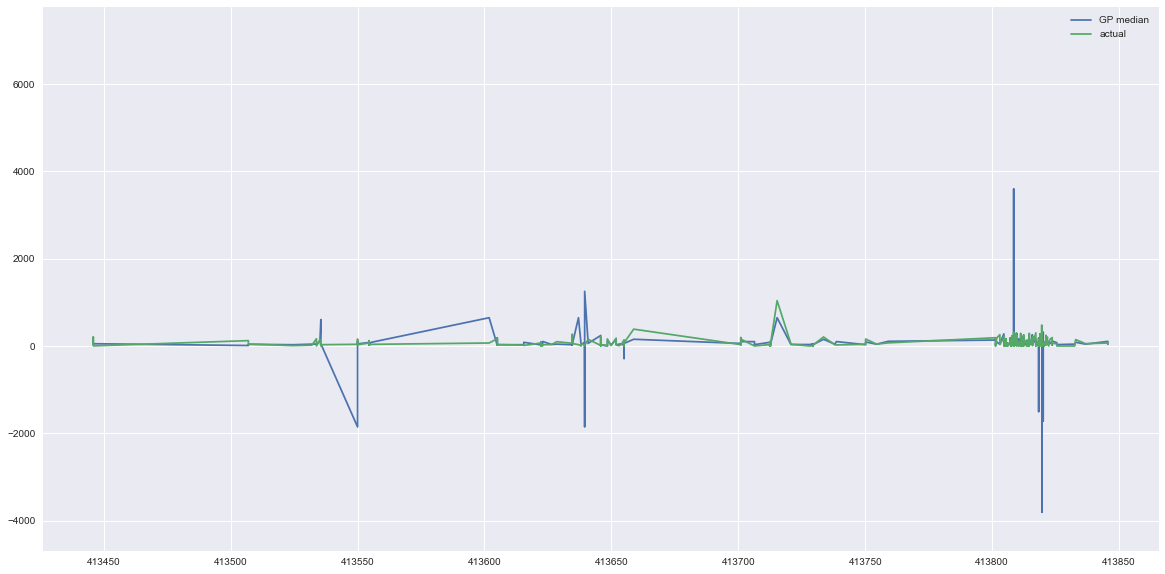

In [1165]:
#t = np.linspace(0, 10, 500)
#gp.compute(x, yerr)

#mu, cov = gp.predict(y, t)
#std = np.sqrt(np.diag(cov))

fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(X1d_test, y1d_pred, label="GP median")
#ax.scatter(X1d_train, y1d_train, label="train data")
ax.plot(X1d_test, y1d_test, label="actual")
ax.fill_between(X1d_test, y1d_pred-sigma*y1d_pred, y1d_pred+sigma*y1d_pred, alpha=0.5)
# explicit zorder to draw points and errorbars on top of everything
#ax.errorbar(x, y, yerr=yerr, fmt='ok', zorder=3, label="samples")
#plt.ylim(0, 100)
#plt.xlim(413600,413650)
ax.legend(loc='best')

Now the version with the incorrectly-formatted lat/longs: (the old one)

In [1124]:
df

,screen_alt_mid_ft,lat,long,nitrate_um,chloride_um,B_um
0,20.76,413700.98,703258.18,1,239,0.600
1,10.76,413700.98,703258.18,172,616,1.200
2,0.76,413700.98,703258.18,26,790,1.500
3,-9.24,413700.98,703258.18,60,336,1.000
5,-13.12,413701.00,703258.19,116,344,1.100
6,-14.12,413701.00,703258.19,125,349,1.100
7,-14.24,413700.98,703258.18,125,342,1.200
8,-15.12,413701.00,703258.19,132,365,1.200
9,-16.12,413701.00,703258.19,127,349,1.100
10,-18.12,413701.00,703258.19,133,414,1.700


In [1135]:
X1d,y1d = df.drop(['chloride_um', 'nitrate_um', 'B_um', 'screen_alt_mid_ft', 'long'], axis=1),df['nitrate_um']

In [1136]:
X1d_train, X1d_test, y1d_train, y1d_test = train_test_split(X1d, y1d, test_size=0.3)

In [1137]:
gp1d = GaussianProcessRegressor(n_restarts_optimizer=9, normalize_y = True, alpha = 1e-10)

In [1138]:
y1d_train

263     190
981      35
1162     34
1071     30
92      148
436     109
1116     43
273      12
421     146
718      30
816     290
200       1
769       1
867      48
955      14
496      37
811     101
675      39
229       4
370     248
883      44
932      54
655      27
152       1
241       1
220       4
754       1
310       1
272     168
1147     44
       ... 
90      188
1015     24
174       4
545     649
1088     30
945      11
511       1
368     222
189      34
890      67
965      58
840       8
919      53
1234     65
144     116
1225     30
1257     63
901      59
749       1
118      28
1067     32
183     198
1022     95
307       3
554       4
238       1
1191     40
929       1
1106     28
430      92
Name: nitrate_um, dtype: int64

In [1108]:
df

,screen_alt_mid_ft,lat,long,nitrate_um,chloride_um,B_um
0,20.76,413700.98,703258.18,1,239,0.600
1,10.76,413700.98,703258.18,172,616,1.200
2,0.76,413700.98,703258.18,26,790,1.500
3,-9.24,413700.98,703258.18,60,336,1.000
5,-13.12,413701.00,703258.19,116,344,1.100
6,-14.12,413701.00,703258.19,125,349,1.100
7,-14.24,413700.98,703258.18,125,342,1.200
8,-15.12,413701.00,703258.19,132,365,1.200
9,-16.12,413701.00,703258.19,127,349,1.100
10,-18.12,413701.00,703258.19,133,414,1.700


In [1139]:
gp1d.fit(X1d_train, y1d_train)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
             n_restarts_optimizer=9, normalize_y=True,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [1140]:
y1d_pred, sigma = gp1d.predict(X1d_test, return_std=True)

In [1141]:
y1d_pred

array([  2.71355004e+01,   8.44544091e+01,   3.96774926e+01,
         4.51685815e+01,   5.49023461e+01,   4.96044946e+01,
         1.25249880e+02,   3.51223168e+01,   3.92288842e+01,
         3.06015649e+01,   5.02329125e+01,   1.06750124e+02,
         5.38173852e+01,   9.88239770e+01,   3.98609948e+01,
         9.62763237e-01,   1.25249880e+02,   7.73530297e+01,
         3.93450952e+01,   4.71799340e+01,   5.05151391e+01,
         4.25058312e+01,   5.93221459e+01,   2.79998803e+01,
         4.99023461e+01,   3.96774926e+01,   4.73945336e+01,
         3.70314965e+01,   3.96774926e+01,   1.25249880e+02,
         3.47087426e+01,   1.99999880e+02,   3.96774926e+01,
         3.69249291e+01,   5.65471215e+01,   1.06750124e+02,
         5.07937646e+01,   6.91080346e+01,   1.42700686e+02,
         1.67000000e+02,   1.10222201e+02,   1.10222201e+02,
         7.73530297e+01,   2.14499955e+02,  -5.03960587e+02,
         1.23790041e+02,   2.28666636e+02,   6.82978780e+01,
         5.47236352e+01,

In [1142]:
X1d_test = np.resize(X1d_test, (len(y1d_test),))

In [1143]:
X1d_test.sort()

ValueError: operands could not be broadcast together with shapes (352,) (62,) 

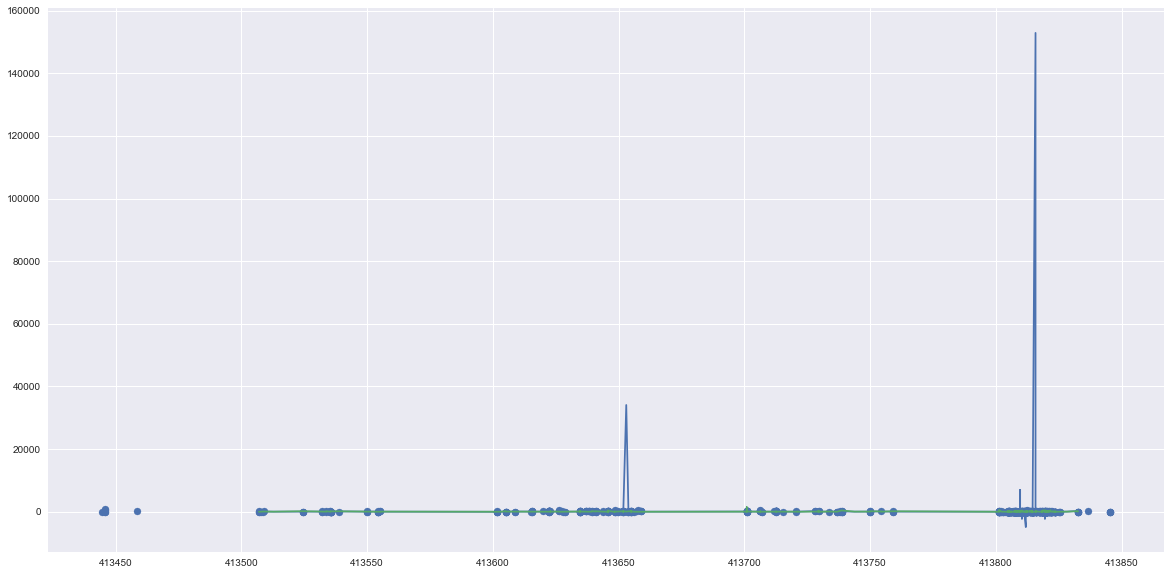

In [1144]:
#t = np.linspace(0, 10, 500)
#gp.compute(x, yerr)

#mu, cov = gp.predict(y, t)
#std = np.sqrt(np.diag(cov))

fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(X1d_test, y1d_pred, label="GP median")
ax.scatter(X1d_train, y1d_train, label="train data")
ax.plot(X1d_test, y1d_test, label="actual")
ax.fill_between(X1d_test, y1d_pred-scaled_sigma, y1d_pred+scaled_sigma, alpha=0.5)
# explicit zorder to draw points and errorbars on top of everything
#ax.errorbar(x, y, yerr=yerr, fmt='ok', zorder=3, label="samples")
#plt.ylim(0, 100)
#plt.xlim(413600,413650)
ax.legend(loc='best')

AAAAAH I can't even get it to reproduce! I've even run the thing from the top exactly the same way I had it before. 

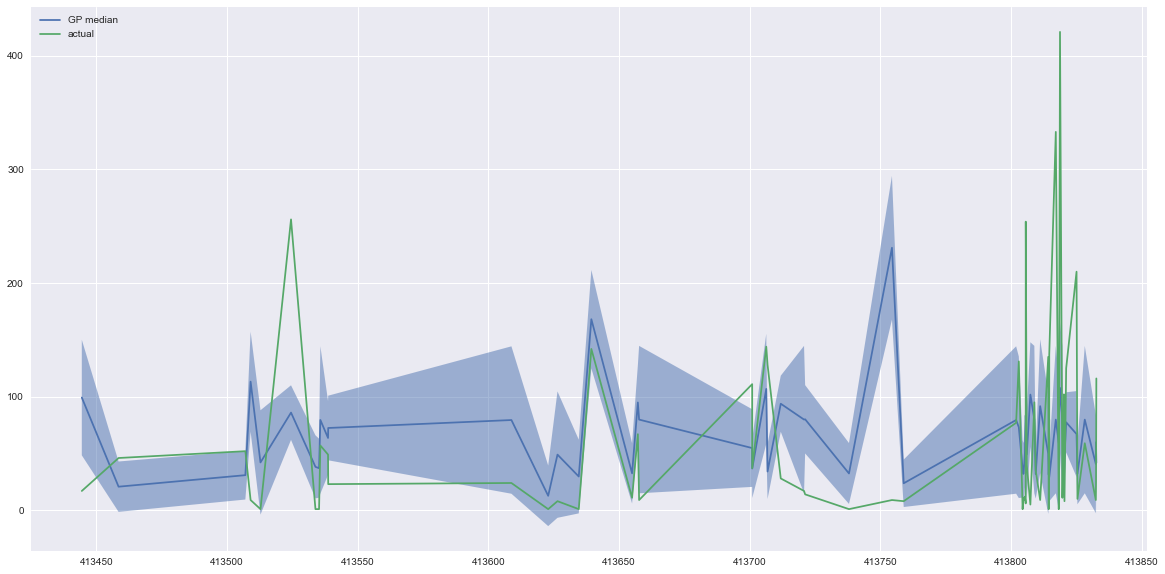

In [784]:
###DON"T RUN ME###
#t = np.linspace(0, 10, 500)
#gp.compute(x, yerr)

#mu, cov = gp.predict(y, t)
#std = np.sqrt(np.diag(cov))

afig, ax = plt.subplots(figsize=(20, 10))

ax.plot(X1d_test, y1d_pred, label="GP median")
#ax.scatter(X1d_train, y1d_train, label="train data")
ax.plot(X1d_test, y1d_test, label="actual")
ax.fill_between(X1d_test, y1d_pred-scaled_sigma, y1d_pred+scaled_sigma, alpha=0.5)
# explicit zorder to draw points and errorbars on top of everything
#ax.errorbar(x, y, yerr=yerr, fmt='ok', zorder=3, label="samples")
#plt.ylim(0, 100)
#plt.xlim(413600,413650)
ax.legend(loc='best')

# Note to andrew: Relevant section ends here. # note to self: try different score functions

### Slicing instead of projecting data into lower dimensions:

In [787]:
df

,screen_alt_mid_ft,lat,long,nitrate_um,chloride_um,B_um
0,20.76,413700.98,703258.18,1,239,0.600
1,10.76,413700.98,703258.18,172,616,1.200
2,0.76,413700.98,703258.18,26,790,1.500
3,-9.24,413700.98,703258.18,60,336,1.000
5,-13.12,413701.00,703258.19,116,344,1.100
6,-14.12,413701.00,703258.19,125,349,1.100
7,-14.24,413700.98,703258.18,125,342,1.200
8,-15.12,413701.00,703258.19,132,365,1.200
9,-16.12,413701.00,703258.19,127,349,1.100
10,-18.12,413701.00,703258.19,133,414,1.700


In [788]:
df.mode()

,screen_alt_mid_ft,lat,long,nitrate_um,chloride_um,B_um
0,-45.95,413805.43,703225.22,1.0,180,1.1
1,NaN,NaN,NaN,NaN,192,NaN


(70.576149086021502, 70.530767580645161)

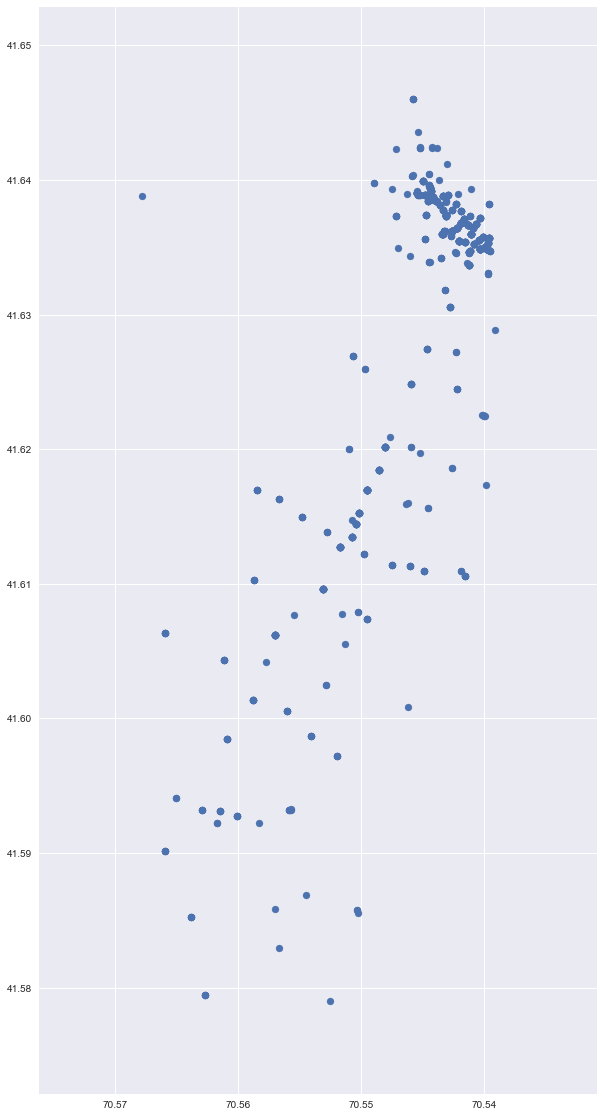

In [853]:
plt.figure(figsize=(10,20))
plt.scatter(df['long_dec'], df['lat_dec'])
ax = plt.gca()
ax.set_xlim(ax.get_xlim()[::-1])